# <div align='center' id="top"> Augmentation for gender classification task  </div>

## `Table of contents`

- ###  <a href="#split">Train-Test Split</a>
- ###  <a href="#data_vis">Visualization</a>


### <div align='center' id="split">Train-Test Split</div>



<div align = "right"><a href="#top" > Back to top </a></div>

In [4]:
import os
import shutil
import random
from collections import defaultdict

# Paths
source_folder = "gender_data"
output_folder = "gender_split"
random.seed(42)
for gender_label in ["male", "female"]:
    src = os.path.join(source_folder, gender_label)
    dst_train = os.path.join(output_folder, gender_label, "train")
    dst_test = os.path.join(output_folder, gender_label, "test")
    os.makedirs(dst_train, exist_ok=True)
    os.makedirs(dst_test, exist_ok=True)

    # Group by age to avoid age bias
    age_groups = defaultdict(list)
    for fname in os.listdir(src):
        if not fname.endswith(".jpg"):
            continue
        age = int(fname.split("_")[0])
        age_groups[age].append(fname)

    for age, files in age_groups.items():
        random.shuffle(files)
        split_index = int(len(files) * 0.8)
        train_files = files[:split_index]
        test_files = files[split_index:]

        for f in train_files:
            shutil.copy2(os.path.join(src, f), os.path.join(dst_train, f))
        for f in test_files:
            shutil.copy2(os.path.join(src, f), os.path.join(dst_test, f))

print("Gender-based train/test split done (balanced by age).")


Gender-based train/test split done (balanced by age).


### <div align='center' id="data_vis">Visualization</div>



<div align = "right"><a href="#top" > Back to top </a></div>

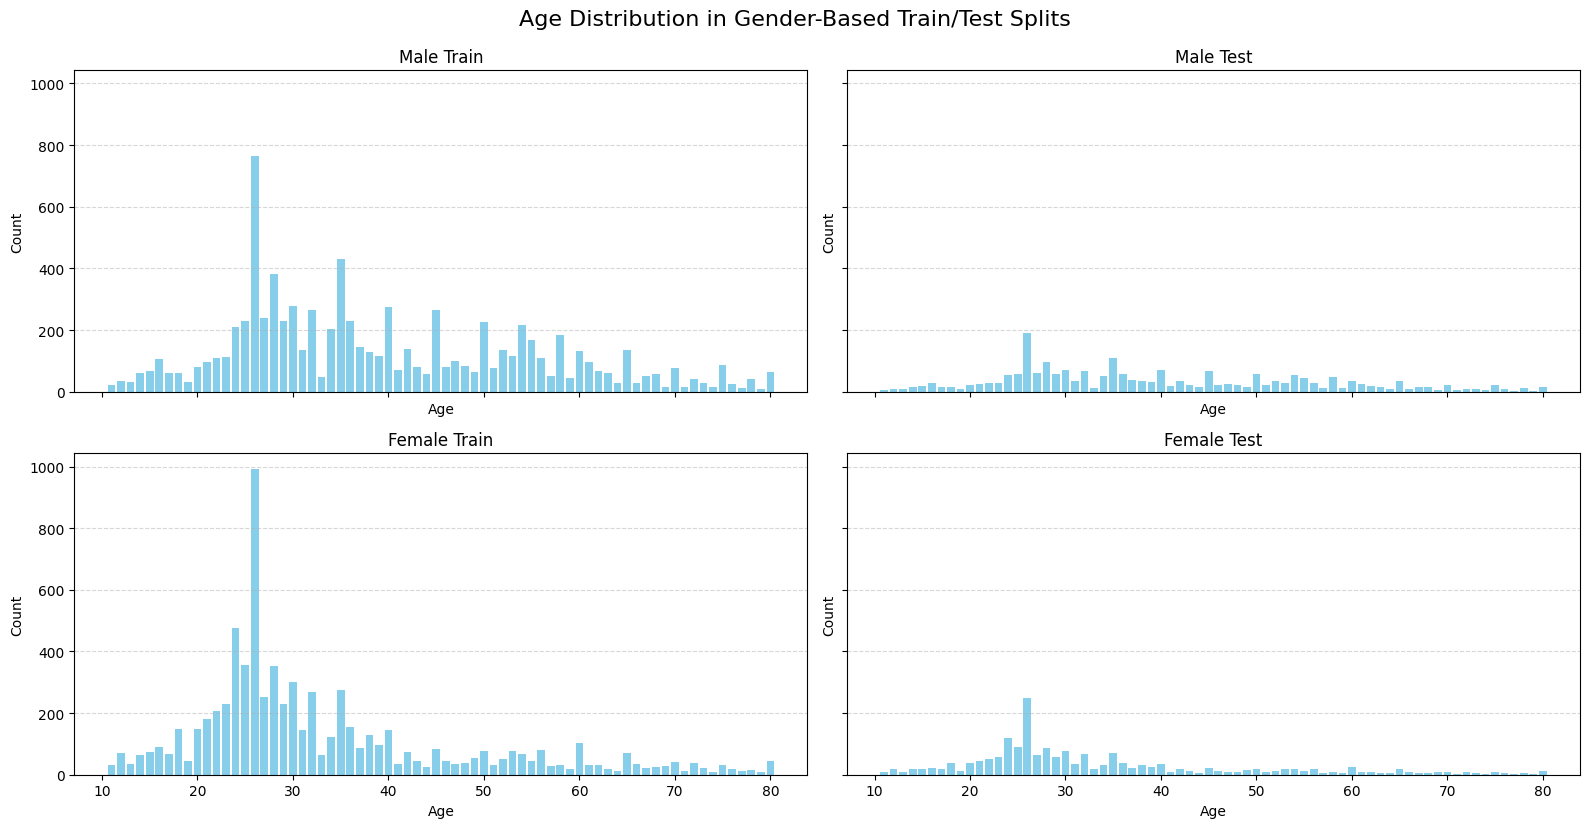

In [5]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Set paths
base_path = "gender_split"
male_train = os.path.join(base_path, "male", "train")
male_test = os.path.join(base_path, "male", "test")
female_train = os.path.join(base_path, "female", "train")
female_test = os.path.join(base_path, "female", "test")

def get_age_distribution(folder):
    age_counts = defaultdict(int)
    for fname in os.listdir(folder):
        if not fname.endswith(".jpg"):
            continue
        age = int(fname.split("_")[0])
        age_counts[age] += 1
    return age_counts

# Get distributions
distributions = {
    "Male Train": get_age_distribution(male_train),
    "Male Test": get_age_distribution(male_test),
    "Female Train": get_age_distribution(female_train),
    "Female Test": get_age_distribution(female_test)
}

# Plot
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=True, sharey=True)
axes = axes.ravel()

for i, (title, age_dist) in enumerate(distributions.items()):
    ages = sorted(age_dist)
    counts = [age_dist[age] for age in ages]
    axes[i].bar(ages, counts, color="skyblue")
    axes[i].set_title(title)
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Count")
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.suptitle("Age Distribution in Gender-Based Train/Test Splits", fontsize=16, y=1.03)
plt.show()


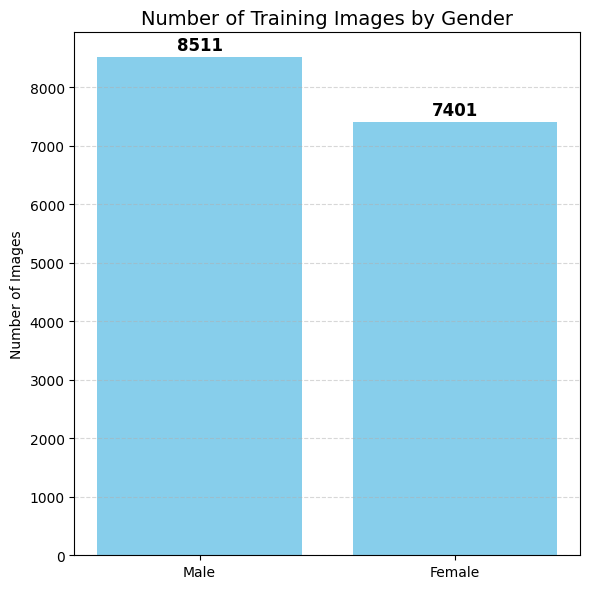

In [6]:
import os
import matplotlib.pyplot as plt

# Paths
male_train_path = "gender_split/male/train"
female_train_path = "gender_split/female/train"

# Count images
male_count = len([f for f in os.listdir(male_train_path) if f.endswith(".jpg")])
female_count = len([f for f in os.listdir(female_train_path) if f.endswith(".jpg")])

# Data
labels = ['Male', 'Female']
counts = [male_count, female_count]

# Plot
plt.figure(figsize=(6, 6))
bars = plt.bar(labels, counts, color='skyblue')

# Add values on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, str(height), 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and grid
plt.title("Number of Training Images by Gender", fontsize=14)
plt.ylabel("Number of Images")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


`Due to the good balancing of the data, augmentation won't be carried on`